In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle 

# Loading the separability results

In [2]:
with open('../../results/separability_results/MBA_ECG805_data.out_z_test.pickle','rb') as f:
    pairwise_805 = pickle.load(f)
    
with open('../../results/separability_results/MBA_ECG820_data.out_z_test.pickle','rb') as f:
    pairwise_820 = pickle.load(f)
    
with open('../../results/separability_results/SED.out_z_test.pickle','rb') as f:
    pairwise_SED = pickle.load(f)
    
    
separability_dict = {}
for key in pairwise_805.keys():
    separability_dict[key] = np.mean([pairwise_805[key],pairwise_820[key],pairwise_SED[key]])

# Loading the robustness results

In [3]:
with open('../../results/robustness_results/noise_lag_result.pickle','rb') as f:
    noise_lag_dict = pickle.load(f)
    
with open('../../results/robustness_results/ratio_result.pickle','rb') as f:
    ratio_dict = pickle.load(f)

# Plotting the results

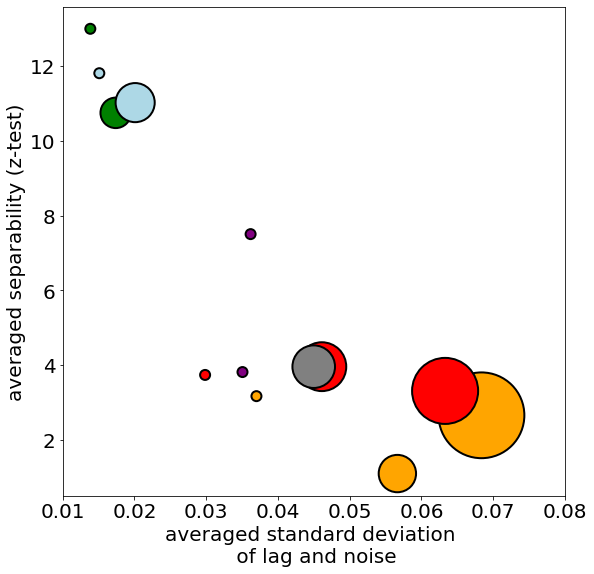

In [18]:
color_point = [
    'green','green','lightblue',
    'lightblue','purple','purple',
    'orange','orange','orange',
    'red','red','red','grey',
]

plt.rcParams.update({'font.size': 20})

list_s = [val for val in list(ratio_dict.values())]
list_s = ((np.array(list_s) - min(list_s))/(max(list_s) - min(list_s)) + 1.1)**12
list_s = [max(100,val) for val in list_s]

plt.figure(figsize=(9,9))
plt.scatter(noise_lag_dict.values(),separability_dict.values(),s=list_s,edgecolors='black',linewidth=2,c=color_point)
#for i, txt in enumerate(ratio_dict.keys()):
#    plt.annotate(txt, (list(noise_lag_dict.values())[i], 0.2+list(separability_dict.values())[i]))
plt.xlim(0.01,0.08)
plt.xlabel('averaged standard deviation \n of lag and noise')
plt.ylabel('averaged separability (z-test)')

plt.savefig("globalresults.pdf")
